# Explicación

El Teorema del Límite Central establece que:


> A medida que el tamaño de la muestra aumenta, la distribución de la media muestral se aproxima a una distribución normal, incluso si la población original es binaria (como el lanzamiento de una moneda).

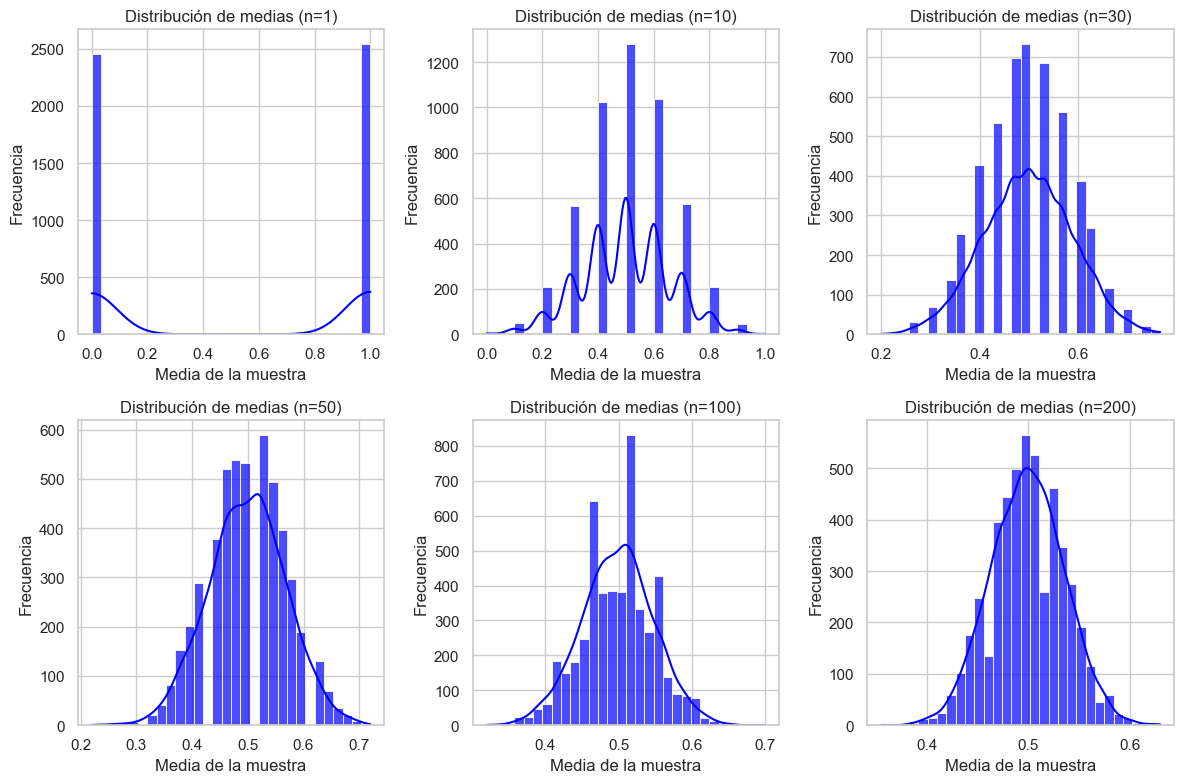

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Simulación de lanzamientos de una moneda
np.random.seed(1998)
def simulate_coin_tosses(num_tosses, num_experiments):
    """Simula el lanzamiento de una moneda num_tosses veces en num_experiments experimentos."""
    return np.random.choice([0, 1], size=(num_experiments, num_tosses))

# Parámetros de la simulación
num_tosses = [1, 10, 30, 50, 100, 200]  # Diferentes tamaños de muestra
num_experiments = 5000  # Número de experimentos

plt.figure(figsize=(12, 8))

for i, n in enumerate(num_tosses):
    samples = simulate_coin_tosses(n, num_experiments)
    sample_means = samples.mean(axis=1)  # Media de cada experimento
    
    plt.subplot(2, 3, i + 1)
    sns.histplot(sample_means, bins=30, kde=True, color='blue', alpha=0.7)
    plt.title(f"Distribución de medias (n={n})")
    plt.xlabel("Media de la muestra")
    plt.ylabel("Frecuencia")
    
plt.tight_layout()
plt.show()


---------

## **Ejemplo en la vida real:**


Supongamos que estamos analizando el número de llamadas que recibe un centro de emergencias por hora. Este número sigue una distribución de Poisson, ya que los eventos (llamadas) ocurren de manera independiente en un intervalo de tiempo fijo. Si tomamos muestras de diferentes horas y calculamos el promedio de llamadas por hora, observaremos que la distribución de estas medias tenderá a ser normal conforme el tamaño de la muestra aumente, validando el Teorema del Límite Central.

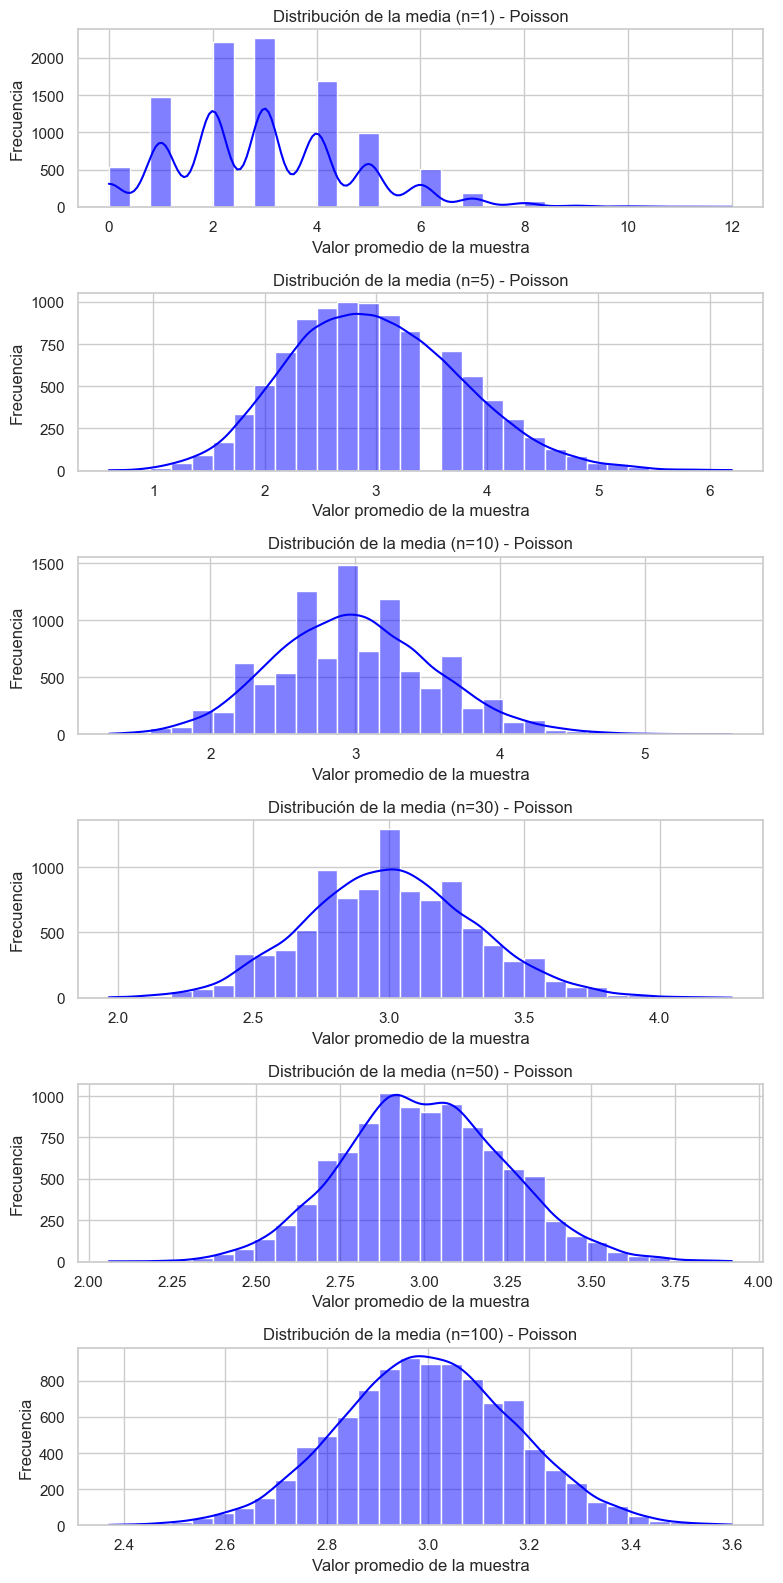

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar Seaborn para mejor apariencia
sns.set(style="whitegrid")

# Simulación de una distribución de Poisson
def generar_poisson(n, lambda_):
    return np.random.poisson(lambda_, size=n)

# Parámetros de la simulación
num_experimentos = 10000  # Número de muestras tomadas
tamano_muestra = [1, 5, 10, 30, 50, 100]  # Tamaños de muestra a evaluar
lambda_poisson = 3  # Parámetro lambda para la distribución de Poisson

# Gráficos
fig, axes = plt.subplots(len(tamano_muestra), 1, figsize=(8, 16))

for i, n in enumerate(tamano_muestra):
    medias_muestras = [np.mean(generar_poisson(n, lambda_poisson)) for _ in range(num_experimentos)]
    
    # Graficar el histograma de las medias
    sns.histplot(medias_muestras, bins=30, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribución de la media (n={n}) - Poisson")
    axes[i].set_xlabel("Valor promedio de la muestra")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()
